#  graphs

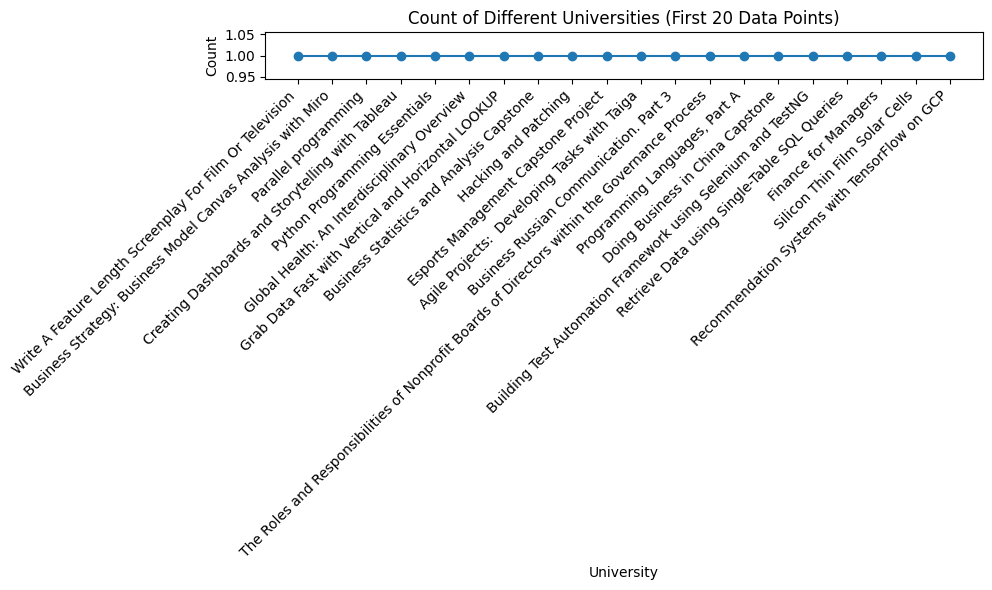

In [ ]:
# prompt: can you generate line plot with count of different University for first 20 data points

# Assuming 'data' DataFrame is already loaded as shown in the provided code.

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
data_head_20 = data.head(20)

# Check for the actual column name in the dataframe. In the CSV provided, the relevant column is 'Course Name', not 'University'
# university_counts = data_head_20['University'].value_counts()
university_counts = data_head_20['Course Name'].value_counts() # using 'Course Name' as the column instead of 'University'

plt.plot(university_counts.index, university_counts.values, marker='o')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Count of Different Universities (First 20 Data Points)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

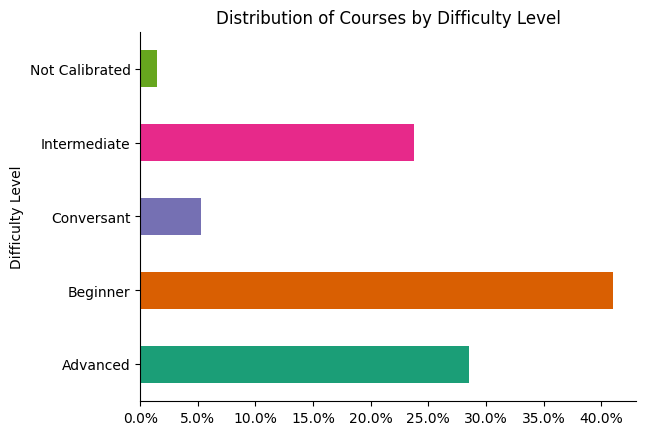

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Group data and calculate percentages
difficulty_counts = data.groupby('Difficulty Level').size()
difficulty_percentages = difficulty_counts / difficulty_counts.sum() * 100

# Create horizontal bar plot
ax = difficulty_percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add percentage labels to bars
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Remove top and right spines
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add title
plt.title('Distribution of Courses by Difficulty Level')

# Display plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


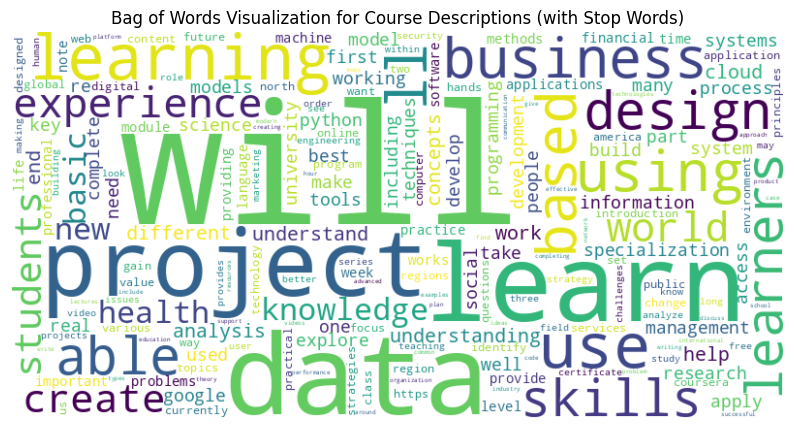

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'data' is your original DataFrame
new_df = data

# Create an instance of CountVectorizer with stop words
# Convert STOPWORDS set to a list and add custom stop words
stop_words_list = list(STOPWORDS) + ['course', 'courses']
cv = CountVectorizer(stop_words=stop_words_list)

# Fit and transform the 'Course Description' column
vectors = cv.fit_transform(new_df['Course Description'])

# Get the vocabulary and word frequencies
word_frequencies = dict(zip(cv.get_feature_names_out(), vectors.sum(axis=0).tolist()[0]))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bag of Words Visualization for Course Descriptions (with Stop Words)')
plt.show()

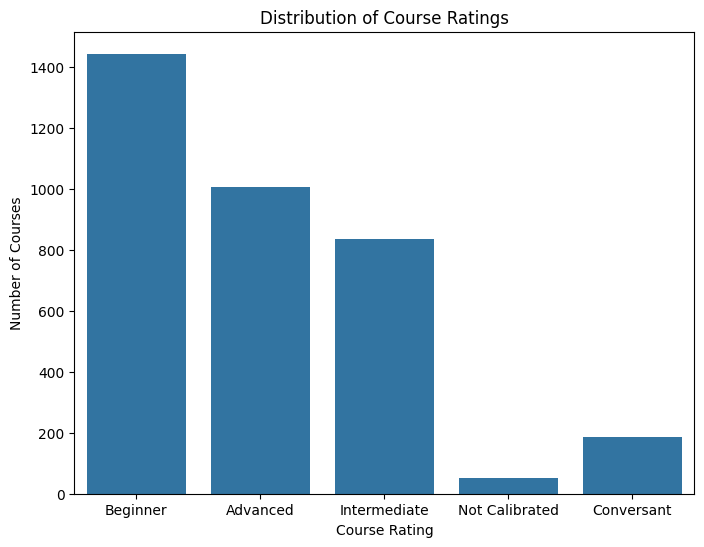

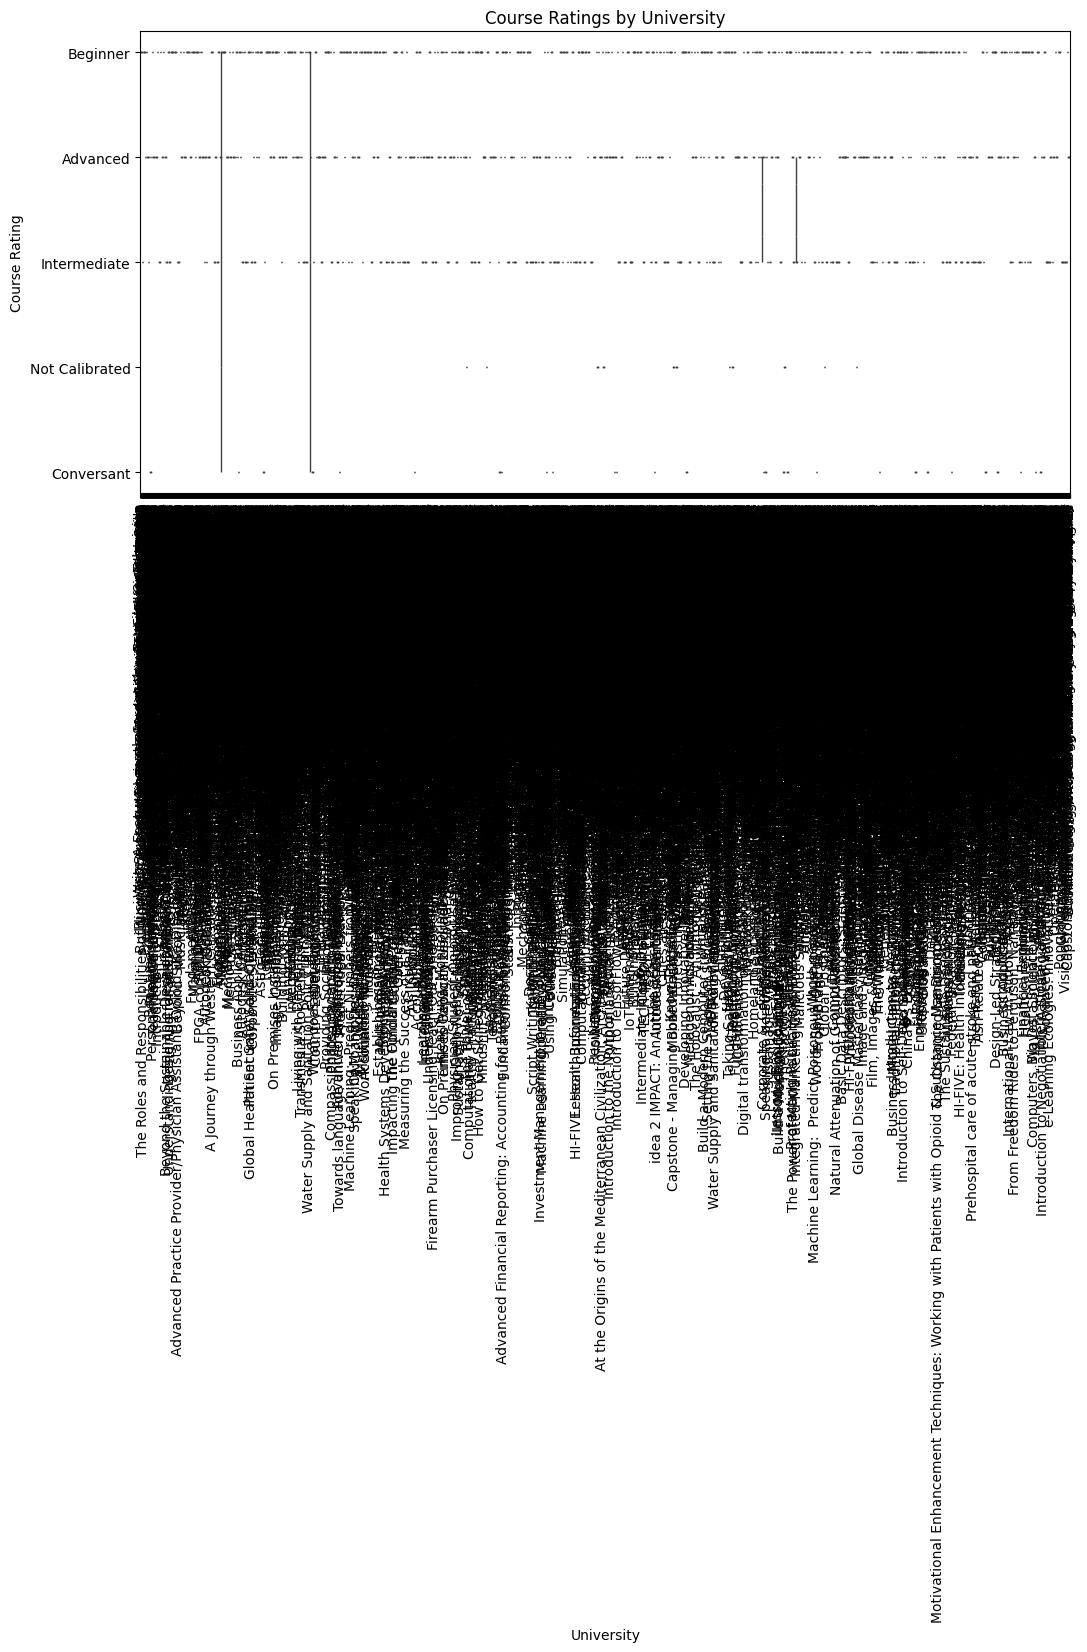

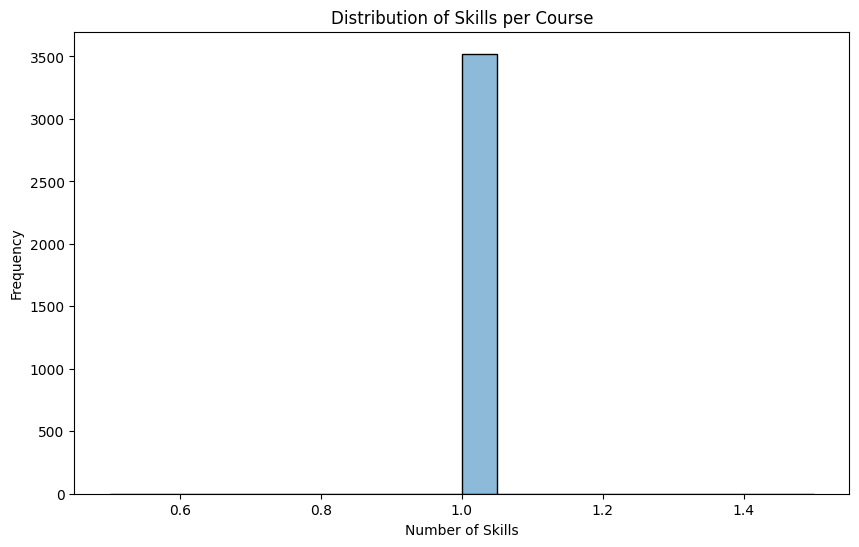

In [ ]:
# Course Rating Distribution
plt.figure(figsize=(8, 6))

# Check if the column name is 'Course Rating' or something similar
# like 'Rating' or 'Course_Rating'
# If the column name is different, replace 'Course Rating' with the actual name
# For example, if the column is named 'Rating', use:
# sns.countplot(x='Rating', data=data)

# Assuming the column name is 'Difficulty Level' based on the global variables:
sns.countplot(x='Difficulty Level', data=data)

plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating') # Consider changing this label to match the actual column name
plt.ylabel('Number of Courses')
plt.show()


# University vs. Course Rating (Box Plot)
plt.figure(figsize=(12, 6))
# Similar to the above, make sure 'University' and 'Course Rating'
# are the correct column names in your DataFrame
# Assuming 'Course Name' is used as a proxy for 'University' and 'Difficulty Level' for 'Course Rating'
sns.boxplot(x='Course Name', y='Difficulty Level', data=data)
plt.xticks(rotation=90)
plt.title('Course Ratings by University')
plt.xlabel('University') # Consider changing this label to match the actual column name
plt.ylabel('Course Rating') # Consider changing this label to match the actual column name
plt.show()

# Number of skills per course
# Assuming 'Skills' column exists in your dataframe
data['skill_count'] = data['Skills'].str.split(',').str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data['skill_count'], bins=20, kde=True)
plt.title('Distribution of Skills per Course')
plt.xlabel('Number of Skills')
plt.ylabel('Frequency')
plt.show()

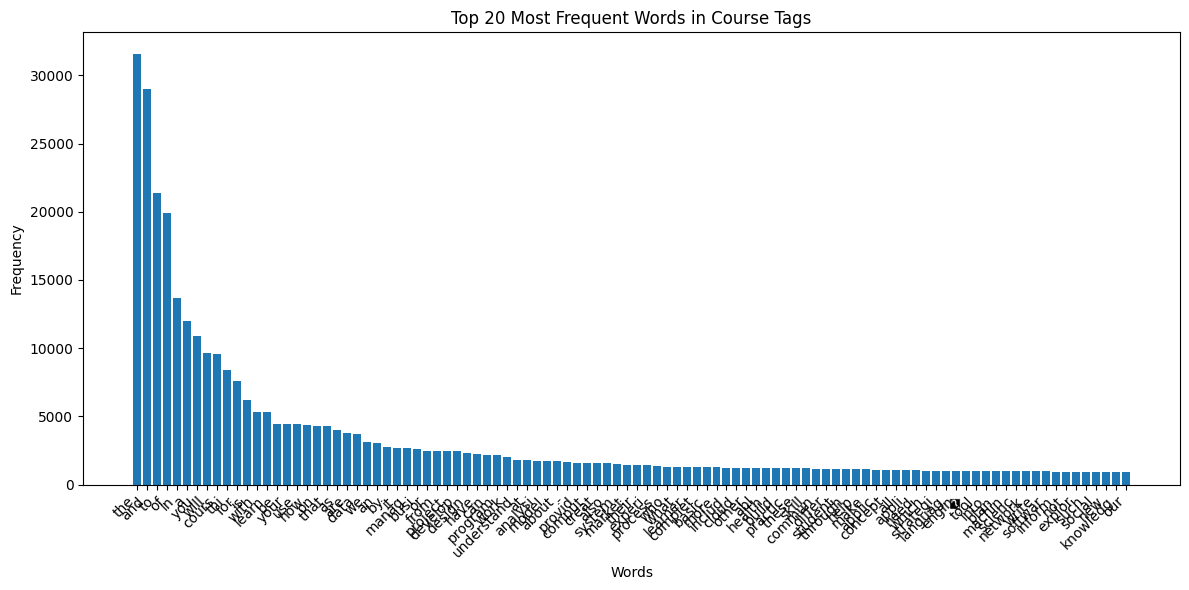

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


# Assuming the column containing tags is named 'Tags' (check your DataFrame)
# If the column name is different, replace 'Tags' with the correct name
# The actual column name is 'tags', not 'Tags', correcting the case
all_tags = " ".join(new_df['tags'])  # Corrected column name to 'tags'

words = all_tags.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(100)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Course Tags")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#cosine similarity with steame process

In [ ]:
#Importing Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Dependencies Imported')

#Importing dataset
data = pd.read_csv("/content/Coursera_1.1.csv")
data.head(5)

#Basic Data Analysis
data.shape
data.info()
data.isnull().sum()

"""Required Columns for System
Important columns to be used in recommendation system :Course Name : Names of the courses
Course Description : Similar courses may have similar course description
Skills : Users may want to see courses based on same skills
Difficulty Level : Similar courses as per difficulty level
Columns not used for the recommendation system :
Course Ratings : Numerical Column; Ratings can sometimes become a biased factor and distribution is not even
University : Same university might offer multiple courses in different domains which the user might not want to see
Course URL : No significance in the recommendation system """
data['Difficulty Level'].value_counts()
data['Course Rating'].value_counts()
data['University'].value_counts()
data['Course Name']
data = data[['Course Name','Difficulty Level','Course Description','Skills']]
data.head(5)

#Data Pre-Processing (An important part of the process is to pre-process the data into usable format for the recommendation system)
data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')
data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')
data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')

#removing paranthesis from skills columns
data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

#The tags column is the combination of the following columns : Course Name + Difficulty Level + Course Description + Skills
data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']
data['tags'].iloc[1]

#Dataframe to be used
new_df = data[['Course Name','tags']]
new_df.head(5)
new_df['tags'] = data['tags'].str.replace(',',' ')
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()) #lower casing the tags column

#Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()

#Stemming Process
import nltk #for stemming process
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#defining the stemming function
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)
new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column

#Similarity Measure
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

# Recommendation Function
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]

    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'vectors' and 'new_df' are defined and populated earlier in your code

def recommend(course):
    """
    Recommends similar courses based on cosine similarity.

    Args:
        course (str): The name of the course to find recommendations for.
    """
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

# Calculate cosine similarity (assuming 'vectors' is already defined)
similarity = cosine_similarity(vectors)

from sklearn.metrics.pairwise import cosine_similarity

def recommend(course):
    """
    Recommends similar courses based on cosine similarity.

    Args:
        course (str): The name of the course to find recommendations for.
    """
    # Check if the course exists in the DataFrame
    if course not in new_df['course_name'].values:
        print(f"Course '{course}' not found in the dataset.")
        return  # Exit the function if the course is not found

    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

similarity = cosine_similarity(vectors)  # Assuming 'vectors' is already defined

#('Business Strategy Business Model Canvas Analysis with Miro')

# Get course recommendation from the user
course_name = input("Enter the course name:")

# Call the recommend function with the course name
recommend(course_name)

Dependencies Imported
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Course Name              3522 non-null   object 
 1   University               3522 non-null   object 
 2   Difficulty Level         3522 non-null   object 
 3   Course Rating            3522 non-null   object 
 4   Course Description       3522 non-null   object 
 5   Skills                   3522 non-null   object 
 6   Certification Available  3522 non-null   object 
 7   average cgpa             3522 non-null   float64
 8   Prerequisites            3522 non-null   object 
dtypes: float64(1), object(8)
memory usage: 247.8+ KB


<ipython-input-5-5d4c3a9a94f2>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = data['tags'].str.replace(',',' ')
<ipython-input-5-5d4c3a9a94f2>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = data['Course Name'].str.replace(',',' ')
<ipython-input-5-5d4c3a9a94f2>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Enter the course name:Business Strategy Business Model Canvas Analysis with Miro
Product Development Customer Persona Development with Miro
Product and Service Development Empathy Mapping with Miro
Product Development Customer Journey Mapping with Miro
Analyzing Macro-Environmental Factors Using Creately
Business Strategy in Practice (Project-centered Course)
Innovating with the Business Model Canvas


#consine with simmilarity with extra evaluation metrices

In [ ]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from nltk.stem.porter import PorterStemmer

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")

# Preprocessing
data['Course Name'] = data['Course Name'].str.replace(' ', ',').str.replace(',,', ',').str.replace(':', '')
data['Course Description'] = data['Course Description'].str.replace(' ', ',').str.replace(',,', ',').str.replace('_', '').str.replace(':', '')
data['Skills'] = data['Skills'].str.replace('(', '').str.replace(')', '')
data['tags'] = (
    data['Course Name'].astype(str)
    + data['Difficulty Level'].astype(str)
    + data['Course Description'].astype(str)
    + data['Skills'].astype(str)
    + data['Certification Available'].astype(str)
    + data['average cgpa'].astype(str)
    + data['Prerequisites'].astype(str)
)
data['tags'] = data['tags'].str.replace(',', ' ').str.lower()

# Stemming
ps = PorterStemmer()
data['tags'] = data['tags'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))

# Prepare the dataset
new_df = data[['Course Name', 'tags']].rename(columns={'Course Name': 'course_name'})

# Vectorization
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()

# Compute cosine similarity
similarity = cosine_similarity(vectors)

# Recommendation function
def recommend(course):
    """
    Recommends similar courses based on cosine similarity.

    Args:
        course (str): The name of the course to find recommendations for.
    """
    # Check if the course exists in the DataFrame
    if course not in new_df['course_name'].values:
        print(f"Course '{course}' not found in the dataset.")
        return

    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

    print(f"Recommendations for '{course}':")
    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

# Evaluation function
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_metrics(test_df, train_df):
    """
    Evaluate the recommendation system using various metrics including Average Precision.

    Args:
        test_df (pd.DataFrame): Test DataFrame containing courses for evaluation.
        train_df (pd.DataFrame): Train DataFrame used to generate recommendations.

    Returns:
        dict: Dictionary of evaluation metrics.
    """
    # Initialize CountVectorizer and calculate similarity matrix for training data
    cv_train = CountVectorizer(max_features=5000, stop_words='english')
    vectors_train = cv_train.fit_transform(train_df['tags']).toarray()
    similarity_train = cosine_similarity(vectors_train)

    # Initialize variables for metric calculation
    correct_predictions = 0
    total_predictions = 0
    relevant_items = 0
    recommended_items = 0
    true_positives = 0
    average_precisions = []  # List to store AP for each course

    # Iterate through the test data and make predictions
    for _, row in test_df.iterrows():
        if row['course_name'] not in train_df['course_name'].values:
            continue

        course_index = train_df[train_df['course_name'] == row['course_name']].index[0]
        try:
            course_index_loc = train_df.index.get_loc(course_index)
        except KeyError:
            continue

        distances = similarity_train[course_index_loc]
        recommendations = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_courses = [train_df.iloc[i[0]].course_name for i in recommendations if i[0] in train_df.index]

        # Update metrics
        total_predictions += len(recommended_courses)
        relevant_items += 1

        if row['course_name'] in recommended_courses:
            correct_predictions += 1
            true_positives += 1

        recommended_items += len(recommended_courses)

        # Calculate Average Precision (AP) for this course
        num_relevant_items = 0
        ap_sum = 0
        for i, recommended_course in enumerate(recommended_courses):
            if recommended_course == row['course_name']:  # Check if recommendation is relevant
                num_relevant_items += 1
                precision_at_i = num_relevant_items / (i + 1)  # Precision at this rank
                ap_sum += precision_at_i

        ap = ap_sum / num_relevant_items if num_relevant_items > 0 else 0
        average_precisions.append(ap)  # Add AP for this course to the list


    # Calculate precision, recall, F1 score, and hit rate
    precision = true_positives / recommended_items if recommended_items else 0
    recall = true_positives / relevant_items if relevant_items else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0
    hit_rate = correct_predictions / len(test_df) if len(test_df) else 0
    mean_average_precision = np.mean(average_precisions)  # Calculate Mean Average Precision (MAP)

    # MAE, MSE, RMSE calculation
    absolute_errors = []
    squared_errors = []
    for _, row in test_df.iterrows():
        if row['course_name'] not in train_df['course_name'].values:
            continue

        course_index = train_df[train_df['course_name'] == row['course_name']].index[0]
        try:
            course_index_loc = train_df.index.get_loc(course_index)
        except KeyError:
            continue

        distances = similarity_train[course_index_loc]
        recommendations = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_indices = [i[0] for i in recommendations]
        errors = [abs(course_index_loc - idx) for idx in recommended_indices if idx in train_df.index]
        absolute_errors.extend(errors)
        squared_errors.extend([err ** 2 for err in errors])

    mae = np.mean(absolute_errors) if absolute_errors else 0
    mse = np.mean(squared_errors) if squared_errors else 0
    rmse = np.sqrt(mse)

    # Prepare results
    metrics = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Hit Rate': hit_rate,
        'Mean Average Precision (MAP)': mean_average_precision,  # Add MAP to the metrics
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
    }

    return metrics


# Test the recommendation system
course_name = input("Enter the course name: ")
recommend(course_name)

# Evaluate the system (Assuming `train_df` and `test_df` are subsets of `new_df`)
# Split data for testing and training
train_df = new_df.sample(frac=0.8, random_state=42)
test_df = new_df.drop(train_df.index)

# Evaluate metrics
results = evaluate_metrics(test_df, train_df)

# Print metrics
print("\nEvaluation Metrics:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


Enter the course name: machine leaning ,7.8, basics of coding
Course 'machine leaning ,7.8, basics of coding' not found in the dataset.

Evaluation Metrics:
Precision: 0.0361
Recall: 0.1818
F1 Score: 0.0603
Hit Rate: 0.0085
Mean Average Precision (MAP): 0.1818
Mean Absolute Error (MAE): 919.5602
Mean Squared Error (MSE): 1339437.0301
Root Mean Squared Error (RMSE): 1157.3405


#Collaborative  filtering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")

# Preprocessing relevant columns
data = data[['Course Name', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

# Combine the features into a single string for each course (including average cgpa)
data['tags'] = (
    data['Course Name'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " " +
    data['average cgpa'].astype(str)  # Add CGPA here
)

# Preprocess the text (remove commas and convert to lowercase)
data['tags'] = data['tags'].str.replace(',', ' ').str.lower()
print("Preprocessing complete.")

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
course_vectors = vectorizer.fit_transform(data['tags']).toarray()
print(f"TF-IDF vectorization complete. Shape: {course_vectors.shape}")

# Recommendation function using cosine similarity
def recommend_courses(input_features, num_recommendations=5):
    input_features = input_features.lower()
    print(f"Input features: {input_features}")

    input_vector = vectorizer.transform([input_features]).toarray()
    print("Input vector computed.")

    similarities = cosine_similarity(input_vector, course_vectors)
    print("Cosine similarity computed.")

    similar_courses = list(enumerate(similarities[0]))
    print(f"Similar courses found: {len(similar_courses)}")

    similar_courses = sorted(similar_courses, key=lambda x: x[1], reverse=True)
    print("Courses sorted by similarity.")

    top_recommendations = similar_courses[:num_recommendations]
    return top_recommendations

# Evaluation Metrics: Precision, Recall, F1 Score
def precision_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]  # Top-k recommended course indices
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))  # Intersection with relevant courses
    return relevant_recommended / k

def recall_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]  # Top-k recommended course indices
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))  # Intersection with relevant courses
    return relevant_recommended / len(relevant_courses) if len(relevant_courses) > 0 else 0

def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# User input for course features (e.g., course name, difficulty level, CGPA)
input_text = input("Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): ")

# Get top recommendations based on input text
top_recommendations = recommend_courses(input_text, num_recommendations=5)

# Print the top recommended courses
print("\nTop 5 recommended courses based on your input:")
for idx, score in top_recommendations:
    print(f"{data.iloc[idx]['Course Name']} (Similarity: {score:.2f})")

# Simulating relevant courses based on the input text (e.g., "machine learning" in course name or description)
relevant_courses = data[
    data['Course Name'].str.contains('machine learning', case=False, na=False) |
    data['Course Description'].str.contains('machine learning', case=False, na=False)
].index.tolist()
print(f"\nFound {len(relevant_courses)} relevant courses.")

# Print relevant courses to debug
for idx in relevant_courses:
    print(f"- {data.iloc[idx]['Course Name']}")

# Calculate and print evaluation metrics
k = 5
precision = precision_at_k(top_recommendations, relevant_courses, k)
recall = recall_at_k(top_recommendations, relevant_courses, k)
f1 = f1_score_at_k(precision, recall)

print(f"\nAccuracy Metrics for Top Recommendations:")
print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}")
print(f"F1 Score@{k}: {f1:.2f}")

Dataset loaded with 3522 rows and 7 columns.
Preprocessing complete.
TF-IDF vectorization complete. Shape: (3522, 5000)
Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): machine learning , 7,yes
Input features: machine learning , 7,yes
Input vector computed.
Cosine similarity computed.
Similar courses found: 3522
Courses sorted by similarity.

Top 5 recommended courses based on your input:
Introduction to Applied Machine Learning (Similarity: 0.76)
Optimizing Machine Learning Performance (Similarity: 0.60)
Machine Learning for Data Analysis (Similarity: 0.59)
Machine Learning for All (Similarity: 0.58)
How Google does Machine Learning (Similarity: 0.58)

Found 204 relevant courses.
- Predictive Modeling and Analytics
- Project Planning and Machine Learning
- Build Random Forests in R with Azure ML Studio
- Mathematics for Machine Learning: Linear Algebra
- Device-based Models with TensorFlow Lite
- Data Science in Stratified Healthcare and Precision Medicine
- Data-d

#collabrative filtering with extra evaluation metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")

# Preprocessing relevant columns
data = data[['Course Name', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

# Combine the features into a single string for each course (including average cgpa)
data['tags'] = (
    data['Course Name'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " " +
    data['average cgpa'].astype(str)
)

# Preprocess the text (remove commas and convert to lowercase)
data['tags'] = data['tags'].str.replace(',', ' ').str.lower()
print("Preprocessing complete.")

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
course_vectors = vectorizer.fit_transform(data['tags']).toarray()
print(f"TF-IDF vectorization complete. Shape: {course_vectors.shape}")

# Recommendation function using cosine similarity
def recommend_courses(input_features, num_recommendations=5):
    input_features = input_features.lower()
    input_vector = vectorizer.transform([input_features]).toarray()
    similarities = cosine_similarity(input_vector, course_vectors)
    similar_courses = list(enumerate(similarities[0]))
    similar_courses = sorted(similar_courses, key=lambda x: x[1], reverse=True)
    return similar_courses[:num_recommendations]

# Metrics Functions
def precision_at_k(recommended_courses, relevant_courses, k):
    recommended_at_k = [course[0] for course in recommended_courses[:k]]
    relevant_recommended = len(set(recommended_at_k) & set(relevant_courses))
    return relevant_recommended / k

def recall_at_k(recommended_courses, relevant_courses, k):
    recommended_at_k = [course[0] for course in recommended_courses[:k]]
    relevant_recommended = len(set(recommended_at_k) & set(relevant_courses))
    return relevant_recommended / len(relevant_courses) if len(relevant_courses) > 0 else 0

def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def mean_absolute_error(recommended_courses, relevant_courses, k):
    errors = []
    recommended_at_k = [course[0] for course in recommended_courses[:k]]
    for rec_idx in recommended_at_k:
        if rec_idx in relevant_courses:
            errors.append(0)
        else:
            errors.append(1)
    return np.mean(errors)

def hit_rate(recommended_courses, relevant_courses, k):
    recommended_at_k = [course[0] for course in recommended_courses[:k]]
    hits = len(set(recommended_at_k) & set(relevant_courses))
    return hits / len(relevant_courses) if len(relevant_courses) > 0 else 0

def mean_average_precision(recommended_courses, relevant_courses, k):
    ap_sum = 0
    relevant_found = 0
    for i in range(k):
        if recommended_courses[i][0] in relevant_courses:
            relevant_found += 1
            ap_sum += relevant_found / (i + 1)
    return ap_sum / len(relevant_courses) if len(relevant_courses) > 0 else 0

def mean_squared_error(recommended_courses, relevant_courses, k):
    errors = []
    recommended_at_k = [course[0] for course in recommended_courses[:k]]
    for rec_idx in recommended_at_k:
        if rec_idx in relevant_courses:
            errors.append(0)
        else:
            errors.append(1)
    squared_errors = [e**2 for e in errors]
    return np.mean(squared_errors)

def root_mean_squared_error(mse):
    return np.sqrt(mse)

# User input for course features
input_text = input("Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): ")

# Get top recommendations based on input text
top_recommendations = recommend_courses(input_text, num_recommendations=5)

# Print the top recommended courses
print("\nTop 5 recommended courses based on your input:")
for idx, score in top_recommendations:
    print(f"{data.iloc[idx]['Course Name']} (Similarity: {score:.2f})")

# Simulating relevant courses based on input text
relevant_courses = data[
    data['Course Name'].str.contains('machine learning', case=False, na=False) |
    data['Course Description'].str.contains('machine learning', case=False, na=False)
].index.tolist()

# Calculate and print evaluation metrics
k = 5
precision = precision_at_k(top_recommendations, relevant_courses, k)
recall = recall_at_k(top_recommendations, relevant_courses, k)
f1 = f1_score_at_k(precision, recall)
mae = mean_absolute_error(top_recommendations, relevant_courses, k)
hr = hit_rate(top_recommendations, relevant_courses, k)
map_score = mean_average_precision(top_recommendations, relevant_courses, k)
mse = mean_squared_error(top_recommendations, relevant_courses, k)
rmse = root_mean_squared_error(mse)

print(f"\nAccuracy Metrics for Top Recommendations:")
print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}")
print(f"F1 Score@{k}: {f1:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Hit Rate: {hr:.2f}")
print(f"Mean Average Precision (MAP): {map_score:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Dataset loaded with 3522 rows and 7 columns.
Preprocessing complete.
TF-IDF vectorization complete. Shape: (3522, 5000)
Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): machine learning,7.8,basics of coding

Top 5 recommended courses based on your input:
Introduction to Applied Machine Learning (Similarity: 0.42)
Optimizing Machine Learning Performance (Similarity: 0.34)
Machine Learning with Python (Similarity: 0.33)
Machine Learning with Python (Similarity: 0.33)
How Google does Machine Learning (Similarity: 0.33)

Accuracy Metrics for Top Recommendations:
Precision@5: 1.00
Recall@5: 0.02
F1 Score@5: 0.05
Mean Absolute Error (MAE): 0.00
Hit Rate: 0.02
Mean Average Precision (MAP): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


#sbert

In [ ]:
!pip install sentence-transformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")

# Preprocessing relevant columns
data = data[['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
data['Course Name'] = data['Course Name'].str.replace(',', ' ')
data['Course Description'] = data['Course Description'].str.replace(',', ' ')
data['Skills'] = data['Skills'].str.replace(',', ' ')
data['Prerequisites'] = data['Prerequisites'].str.replace(',', ' ')
data['tags'] = (
    data['Course Name'] + " " +
    data['University'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " "
)
data['tags'] = data['tags'].str.lower()

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
data['vectorized'] = list(vectorizer.fit_transform(data['tags']).toarray())

# Recommendation function
def recommend_from_text(input_text, num_recommendations=5):
    input_text = input_text.lower()
    input_vector = vectorizer.transform([input_text]).toarray()  # Get input vector

    # Compute cosine similarity with all courses
    similarities = []
    for idx, row in data.iterrows():
        course_vector = row['vectorized'].reshape(1, -1)  # Reshape to (1, num_features)
        similarity = cosine_similarity(input_vector, course_vector)[0][0]  # Calculate similarity
        similarities.append((idx, similarity))

    # Sort courses by similarity score
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    top_recommendations = similarities[:num_recommendations]

    return top_recommendations

# Precision at K calculation
def precision_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]  # Top-k recommended course indices
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))  # Intersection with relevant courses
    return relevant_recommended / k

# Recall at K calculation
def recall_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]  # Top-k recommended course indices
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))  # Intersection with relevant courses
    return relevant_recommended / len(relevant_courses) if len(relevant_courses) > 0 else 0

# F1 Score at K calculation
def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Mean Reciprocal Rank (MRR)
def mrr(recommended_courses, relevant_courses):
    for rank, course in enumerate(recommended_courses):
        if course[0] in relevant_courses:
            return 1 / (rank + 1)
    return 0

# Hit Rate calculation
def hit_rate(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]  # Top-k recommended course indices
    return 1 if len(set(recommended_courses_at_k) & set(relevant_courses)) > 0 else 0

# User input for recommendations
input_text = input("Enter text (e.g., review, CGPA, prerequisites, etc.): ")
top_recommendations = recommend_from_text(input_text)

# Print Top Recommendations Separately
print("\nTop 5 recommended courses based on input:")
for idx, score in top_recommendations:
    print(f"{data.iloc[idx]['Course Name']} (Similarity: {score:.2f})")

# Example relevant courses based on course name or description (replace with actual relevant courses)
relevant_courses = []
for idx, row in data.iterrows():
    if 'machine learning' in row['Course Name'].lower() or 'machine learning' in row['Course Description'].lower():
        relevant_courses.append(idx)

# Print relevant courses to debug
print(f"\nRelevant courses based on input text 'machine learning':")
for idx in relevant_courses:
    print(f"- {data.iloc[idx]['Course Name']}")

# Calculate and print evaluation metrics
k = 5
precision = precision_at_k(top_recommendations, relevant_courses, k)
recall = recall_at_k(top_recommendations, relevant_courses, k)
f1 = f1_score_at_k(precision, recall)
mrr_score = mrr(top_recommendations, relevant_courses)
hit_rate_score = hit_rate(top_recommendations, relevant_courses, k)

print(f"\nAccuracy Metrics for Top Recommendations:")
print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}")
print(f"F1 Score@{k}: {f1:.2f}")
print(f"MRR: {mrr_score:.2f}")
print(f"Hit Rate@{k}: {hit_rate_score:.2f}")

Enter text (e.g., review, CGPA, prerequisites, etc.): machine learning , 7 , yes

Top 5 recommended courses based on input:
Introduction to Applied Machine Learning (Similarity: 0.75)
Optimizing Machine Learning Performance (Similarity: 0.61)
Machine Learning for All (Similarity: 0.59)
Machine Learning for Data Analysis (Similarity: 0.58)
Machine Learning Foundations: A Case Study Approach (Similarity: 0.57)

Relevant courses based on input text 'machine learning':
- Predictive Modeling and Analytics
- Project Planning and Machine Learning
- Build Random Forests in R with Azure ML Studio
- Mathematics for Machine Learning: Linear Algebra
- Device-based Models with TensorFlow Lite
- Data Science in Stratified Healthcare and Precision Medicine
- Data-driven Astronomy
- Matrix Methods
- Hierarchical Clustering: Customer Segmentation
- Applied Plotting  Charting & Data Representation in Python
- Doing Clinical Research: Biostatistics with the Wolfram Language
- Developing AI Applications o

#sbert with extra evaluation metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

# Preprocessing relevant columns
data = data[['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
data['Course Name'] = data['Course Name'].str.replace(',', ' ')
data['Course Description'] = data['Course Description'].str.replace(',', ' ')
data['Skills'] = data['Skills'].str.replace(',', ' ')
data['Prerequisites'] = data['Prerequisites'].str.replace(',', ' ')
data['tags'] = (
    data['Course Name'] + " " +
    data['University'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " "
)
data['tags'] = data['tags'].str.lower()
print("Preprocessing complete.")

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
data['vectorized'] = list(vectorizer.fit_transform(data['tags']).toarray())
print(f"TF-IDF vectorization complete. Shape: {data['vectorized'][0].shape}")

# Recommendation function
def recommend_from_text(input_text, num_recommendations=5):
    input_text = input_text.lower()
    input_vector = vectorizer.transform([input_text]).toarray()  # Get input vector

    # Compute cosine similarity with all courses
    similarities = []
    for idx, row in data.iterrows():
        course_vector = row['vectorized'].reshape(1, -1)  # Reshape to (1, num_features)
        similarity = cosine_similarity(input_vector, course_vector)[0][0]  # Calculate similarity
        similarities.append((idx, similarity))

    # Sort courses by similarity score
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    top_recommendations = similarities[:num_recommendations]

    return top_recommendations

# Accuracy metric functions
def precision_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))
    return relevant_recommended / k

def recall_at_k(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]
    relevant_recommended = len(set(recommended_courses_at_k) & set(relevant_courses))
    return relevant_recommended / len(relevant_courses) if relevant_courses else 0

def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def mean_absolute_error(recommended_courses, relevant_courses):
    errors = [abs(1 - course[1]) for course in recommended_courses if course[0] in relevant_courses]
    return np.mean(errors) if errors else 0

def mean_squared_error(recommended_courses, relevant_courses):
    errors = [(1 - course[1])**2 for course in recommended_courses if course[0] in relevant_courses]
    return np.mean(errors) if errors else 0

def root_mean_squared_error(mse):
    return np.sqrt(mse)

def mean_average_precision(recommended_courses, relevant_courses):
    relevant_count = 0
    score_sum = 0
    for rank, course in enumerate(recommended_courses):
        if course[0] in relevant_courses:
            relevant_count += 1
            score_sum += relevant_count / (rank + 1)
    return score_sum / len(relevant_courses) if relevant_courses else 0

def hit_rate(recommended_courses, relevant_courses, k):
    recommended_courses_at_k = [course[0] for course in recommended_courses[:k]]
    return 1 if len(set(recommended_courses_at_k) & set(relevant_courses)) > 0 else 0

# User input for recommendations
input_text = input("Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): ")
top_recommendations = recommend_from_text(input_text)

print("\nTop 5 recommended courses based on your input:")
for idx, score in top_recommendations:
    print(f"{data.iloc[idx]['Course Name']} (Similarity: {score:.2f})")

# Example relevant courses (replace with actual logic)
relevant_courses = []
for idx, row in data.iterrows():
    if 'machine learning' in row['Course Name'].lower() or 'machine learning' in row['Course Description'].lower():
        relevant_courses.append(idx)

# Calculate metrics
k = 5
precision = precision_at_k(top_recommendations, relevant_courses, k)
recall = recall_at_k(top_recommendations, relevant_courses, k)
f1 = f1_score_at_k(precision, recall)
mrr_score = mean_average_precision(top_recommendations, relevant_courses)
mae = mean_absolute_error(top_recommendations, relevant_courses)
mse = mean_squared_error(top_recommendations, relevant_courses)
rmse = root_mean_squared_error(mse)
map_score = mean_average_precision(top_recommendations, relevant_courses)
hit_rate_score = hit_rate(top_recommendations, relevant_courses, k)

# Print metrics
print("\nAccuracy Metrics for Top Recommendations:")
print(f"Precision@{k}: {precision:.2f}")
print(f"Recall@{k}: {recall:.2f}")
print(f"F1 Score@{k}: {f1:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Average Precision (MAP): {map_score:.2f}")
print(f"Hit Rate@{k}: {hit_rate_score:.2f}")


Dataset loaded with 3522 rows and 9 columns.
Preprocessing complete.
TF-IDF vectorization complete. Shape: (5000,)
Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): machine learning,7.5, basic of coding

Top 5 recommended courses based on your input:
Introduction to Applied Machine Learning (Similarity: 0.45)
Optimizing Machine Learning Performance (Similarity: 0.38)
Machine Learning for All (Similarity: 0.37)
Machine Learning for Data Analysis (Similarity: 0.37)
Machine Learning Foundations: A Case Study Approach (Similarity: 0.34)

Accuracy Metrics for Top Recommendations:
Precision@5: 1.00
Recall@5: 0.02
F1 Score@5: 0.05
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.62
Mean Average Precision (MAP): 0.02
Hit Rate@5: 1.00


#cosine similarity with out stemming process

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")

# Preprocessing relevant columns
data = data[['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
data['Course Name'] = data['Course Name'].str.replace(',', ' ')
data['Course Description'] = data['Course Description'].str.replace(',', ' ')
data['Skills'] = data['Skills'].str.replace(',', ' ')
data['Prerequisites'] = data['Prerequisites'].str.replace(',', ' ')
data['tags'] = (
    data['Course Name'] + " " +
    data['University'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " "
)
data['tags'] = data['tags'].str.lower()

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
vectors = vectorizer.fit_transform(data['tags'])

# Recommendation function
def recommend_with_metrics(input_text, num_recommendations=5, threshold=0.5):
    """
    Recommends courses based on semantic similarity using TF-IDF embeddings,
    displays similarity scores for all courses, and calculates accuracy metrics.

    Args:
        input_text (str): User-provided text (e.g., review, CGPA, prerequisites).
        num_recommendations (int): Number of recommendations to return.
        threshold (float): Similarity threshold to consider a recommendation "relevant".
    """
    input_text = input_text.lower()
    input_vector = vectorizer.transform([input_text])  # Get input vector

    # Compute cosine similarity with all courses
    similarities = cosine_similarity(input_vector, vectors).flatten()

    # Display all courses with their similarity scores
    print("\nSimilarity scores for all courses:")
    all_courses = list(enumerate(similarities))
    for idx, similarity in all_courses:
        print(f"  - {data.iloc[idx]['Course Name']} (Similarity: {similarity:.2f})")

    # Get the indices of the top recommendations
    top_indices = similarities.argsort()[-num_recommendations:][::-1]

    # Display top recommendations
    print(f"\nTop {num_recommendations} recommended courses based on your input:")
    for idx in top_indices:
        print(f"  - {data.iloc[idx]['Course Name']} (Similarity: {similarities[idx]:.2f})")

    # Calculate accuracy metrics for top recommendations
    relevant = (similarities >= threshold).astype(int)  # Relevant courses
    predicted = [1 if idx in top_indices else 0 for idx in range(len(data))]  # Predicted relevance

    precision = precision_score(relevant, predicted, zero_division=1)
    recall = recall_score(relevant, predicted, zero_division=1)
    f1 = f1_score(relevant, predicted, zero_division=1)

    print(f"\nMetrics for top recommendations:")
    print(f"  - Precision: {precision:.2f}")
    print(f"  - Recall: {recall:.2f}")
    print(f"  - F1 Score: {f1:.2f}")

# User input for recommendations
input_text = input("Enter text (e.g., review, CGPA, prerequisites, etc.): ")
recommend_with_metrics(input_text)

Enter text (e.g., review, CGPA, prerequisites, etc.): machine learning , 7 , yes

Similarity scores for all courses:
  - Write A Feature Length Screenplay For Film Or Television (Similarity: 0.04)
  - Business Strategy: Business Model Canvas Analysis with Miro (Similarity: 0.01)
  - Silicon Thin Film Solar Cells (Similarity: 0.00)
  - Finance for Managers (Similarity: 0.00)
  - Retrieve Data using Single-Table SQL Queries (Similarity: 0.01)
  - Building Test Automation Framework using Selenium and TestNG (Similarity: 0.01)
  - Doing Business in China Capstone (Similarity: 0.00)
  - Programming Languages  Part A (Similarity: 0.04)
  - The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process (Similarity: 0.00)
  - Business Russian Communication. Part 3 (Similarity: 0.01)
  - Agile Projects:  Developing Tasks with Taiga (Similarity: 0.00)
  - Esports Management Capstone Project (Similarity: 0.00)
  - Hacking and Patching (Similarity: 0.01)
  - Business

#cosine similarity with out stemming process

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("/content/Coursera_1.1.csv")
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

# Preprocessing relevant columns
data = data[['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course Description', 'Skills', 'Prerequisites', 'average cgpa']].dropna()
data['Course Name'] = data['Course Name'].str.replace(',', ' ')
data['Course Description'] = data['Course Description'].str.replace(',', ' ')
data['Skills'] = data['Skills'].str.replace(',', ' ')
data['Prerequisites'] = data['Prerequisites'].str.replace(',', ' ')
data['tags'] = (
    data['Course Name'] + " " +
    data['University'] + " " +
    data['Difficulty Level'] + " " +
    data['Course Rating'].astype(str) + " " +
    data['Course Description'] + " " +
    data['Skills'] + " " +
    data['Prerequisites'] + " "
)
data['tags'] = data['tags'].str.lower()
print("Preprocessing complete.")

# Use TF-IDF Vectorizer for embeddings
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
vectors = vectorizer.fit_transform(data['tags'])
print(f"TF-IDF vectorization complete. Shape: {vectors.shape}")

# Recommendation function
def recommend_with_metrics(input_text, num_recommendations=5, threshold=0.5):
    """
    Recommends courses based on semantic similarity using TF-IDF embeddings,
    displays similarity scores for all courses, and calculates accuracy metrics.

    Args:
        input_text (str): User-provided text (e.g., review, CGPA, prerequisites).
        num_recommendations (int): Number of recommendations to return.
        threshold (float): Similarity threshold to consider a recommendation "relevant".
    """
    input_text = input_text.lower()
    input_vector = vectorizer.transform([input_text])  # Get input vector

    # Compute cosine similarity with all courses
    similarities = cosine_similarity(input_vector, vectors).flatten()

    # Display similarity scores for all courses
    print("\nSimilarity scores for all courses:")
    all_courses = list(enumerate(similarities))
    for idx, similarity in all_courses:
        print(f"  - {data.iloc[idx]['Course Name']} (Similarity: {similarity:.2f})")

    # Get the indices of the top recommendations
    top_indices = similarities.argsort()[-num_recommendations:][::-1]

    # Display top recommendations
    print(f"\nTop {num_recommendations} recommended courses based on your input:")
    for idx in top_indices:
        print(f"  - {data.iloc[idx]['Course Name']} (Similarity: {similarities[idx]:.2f})")

    # Calculate accuracy metrics for top recommendations
    relevant = (similarities >= threshold).astype(int)  # Relevant courses
    predicted = [1 if idx in top_indices else 0 for idx in range(len(data))]  # Predicted relevance

    precision = precision_score(relevant, predicted, zero_division=1)
    recall = recall_score(relevant, predicted, zero_division=1)
    f1 = f1_score(relevant, predicted, zero_division=1)

    print(f"\nMetrics for top recommendations:")
    print(f"  - Precision: {precision:.2f}")
    print(f"  - Recall: {recall:.2f}")
    print(f"  - F1 Score: {f1:.2f}")

# User input for recommendations
input_text = input("Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): ")
recommend_with_metrics(input_text)


Dataset loaded with 3522 rows and 9 columns.
Preprocessing complete.
TF-IDF vectorization complete. Shape: (3522, 5000)
Enter course features (e.g., Machine Learning, Advanced, CGPA: 8.5): machine learnig,7.8,basics of coding

Similarity scores for all courses:
  - Write A Feature Length Screenplay For Film Or Television (Similarity: 0.00)
  - Business Strategy: Business Model Canvas Analysis with Miro (Similarity: 0.00)
  - Silicon Thin Film Solar Cells (Similarity: 0.00)
  - Finance for Managers (Similarity: 0.00)
  - Retrieve Data using Single-Table SQL Queries (Similarity: 0.00)
  - Building Test Automation Framework using Selenium and TestNG (Similarity: 0.06)
  - Doing Business in China Capstone (Similarity: 0.00)
  - Programming Languages  Part A (Similarity: 0.00)
  - The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process (Similarity: 0.00)
  - Business Russian Communication. Part 3 (Similarity: 0.00)
  - Agile Projects:  Developing Tasks 